In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [4]:
df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [6]:
df.shape

(10834, 18)

In [7]:
df.drop(columns=['ID'],inplace=True)

In [8]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


In [9]:
x = df[[ 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']]
y = df['y']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)


In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

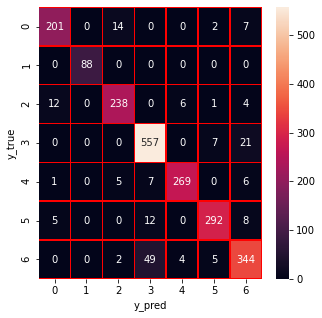

In [12]:
# 1. Logistic Regression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier
classifier = BaggingClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=.9,
 max_depth=1, random_state=0),
                            max_samples=0.5, max_features=0.5)

classifier.fit(X_train,y_train) 

y_pred = classifier.predict(X_test) 

cm = confusion_matrix(y_test,y_pred)

import seaborn as sns
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [13]:
df_test=pd.read_csv('test.csv')

In [14]:

df_predict = sc.transform(df_test.drop(columns=['ID']))
df_predict.shape

(2709, 16)

In [15]:
y_test_pred = classifier.predict(df_predict)

In [16]:
df_predict=pd.DataFrame(df_predict)
df_predict.columns=[ 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

In [17]:
df_predict['ID']=df_test['ID']
df_predict['y']=y_test_pred

In [18]:
df_predict

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ID,y
0,0.158303,0.470454,0.792007,-0.126510,1.593047,1.209811,0.216743,0.303551,-2.628000,-6.385760,-1.353502,-1.649828,0.145319,-1.226814,-1.578520,-7.518121,10834,HOROZ
1,-0.827246,-1.049141,-1.049916,-0.951527,-0.574399,-0.331404,-0.826948,-1.041950,0.362731,0.143313,0.612211,0.520853,1.272732,1.089816,0.491254,0.674487,10835,DERMASON
2,0.056565,0.262844,-0.129191,0.537062,-0.887646,-0.763610,0.071249,0.183471,0.068173,-1.816677,-0.776117,0.880091,-0.811248,0.232601,0.868590,0.125748,10836,BARBUNYA
3,-0.961839,-1.292493,-1.234359,-1.214996,-0.540274,-0.289720,-0.961555,-1.272064,-0.676202,0.249390,1.000662,0.486076,1.836058,1.361546,0.455249,0.824136,10837,DERMASON
4,3.030679,2.702188,2.393416,3.223025,-0.279846,-0.000147,3.022186,2.908808,1.120453,0.023232,-0.092898,0.153263,-2.542647,-1.240729,0.115375,-0.762984,10838,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,0.471296,0.764498,0.939573,0.268441,1.168345,1.022393,0.472080,0.654678,0.202579,-0.269371,-1.080398,-1.165242,-0.507023,-1.138960,-1.147744,-0.832942,13538,CALI
2705,-0.424661,-0.605195,-0.807973,0.092940,-1.499512,-1.990184,-0.431360,-0.435007,0.363156,1.055675,1.613466,1.730149,-0.339517,1.442420,1.800832,0.666722,13539,SEKER
2706,0.280000,0.717948,1.030993,-0.065011,1.900652,1.326176,0.341505,0.443178,-2.814414,-6.351459,-1.980859,-1.890835,0.094249,-1.376655,-1.786070,-8.719394,13540,HOROZ
2707,-0.640760,-0.728998,-0.748253,-0.700616,-0.344715,-0.067888,-0.638881,-0.747809,-0.505283,-0.252428,0.122257,0.259379,0.809272,0.550740,0.222821,0.512707,13541,DERMASON


In [19]:
df_predict[['ID', 'y']].to_csv('dry_beans5.csv', index=False)